<a href="https://colab.research.google.com/github/kumarraviranjan845/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing and Observing the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Global_Terrorism_Data.csv', encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# **Cleaning the Dataset**

**Keeping only Relevant Columns**

In [ ]:
terrorism = df[['iyear', 'country_txt', 'region_txt', 'provstate', 'city', 'location',
                'success', 'suicide', 'claimed', 'attacktype1_txt', 'targtype1_txt', 'gname',
                'motive', 'weaptype1_txt', 'nkill', 'nwound']]

**Renaming the columns**

In [ ]:
terrorism.rename(columns={'iyear': 'year', 'country_txt': 'country', 'region_txt': 'region', 'provstate': 'province/state',
                          'attacktype1_txt': 'attack_type', 'targtype1_txt': 'target_type', 'gname': 'terrorist_group',
                          'weaptype1_txt': 'weapon_type', 'nkill': 'killed', 'nwound': 'wounded'}, inplace=True)

In [ ]:
terrorism.head()

,year,country,region,province/state,city,location,success,suicide,claimed,attack_type,target_type,terrorist_group,motive,weapon_type,killed,wounded
0,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,1,0,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,Mexico,North America,Federal,Mexico city,NaN,1,0,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,Unknown,NaN,1,0,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Attica,Athens,NaN,1,0,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,Fukouka,NaN,1,0,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [ ]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             181691 non-null  int64  
 1   country          181691 non-null  object 
 2   region           181691 non-null  object 
 3   province/state   181270 non-null  object 
 4   city             181257 non-null  object 
 5   location         55495 non-null   object 
 6   success          181691 non-null  int64  
 7   suicide          181691 non-null  int64  
 8   claimed          115571 non-null  float64
 9   attack_type      181691 non-null  object 
 10  target_type      181691 non-null  object 
 11  terrorist_group  181691 non-null  object 
 12  motive           50561 non-null   object 
 13  weapon_type      181691 non-null  object 
 14  killed           171378 non-null  float64
 15  wounded          165380 non-null  float64
dtypes: float64(3), int64(3), object(10)
me

In [ ]:
terrorism.shape

(181691, 16)

In [ ]:
terrorism['killed'] = terrorism['killed'].fillna(0)
terrorism['wounded'] = terrorism['wounded'].fillna(0)

In [ ]:
terrorism['casualties'] = terrorism['killed'] + terrorism['wounded']

# **Analysing the Dataset**

In [ ]:
terrorism.describe()

,year,success,suicide,claimed,killed,wounded,casualties
count,181691.000000,181691.000000,181691.000000,115571.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,0.889598,0.036507,0.049666,2.266860,2.883296,5.150156
std,13.259430,0.313391,0.187549,1.093195,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000
25%,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,9574.000000


## **Overview**

1. **The data is given for the terrorist attacks occured from year 1970 till 2017.**
2. **The maximum number of casualties in an single attack is 9574.**
3. **The maximum number of people killed in an single attack is 1570.**
4. **The maximum number of people injured in an single attack is 8191.**

---



## **Year wise Attacks and Damages**

1. **Year wise Attacks**

In [99]:
year_attacks = terrorism["year"].value_counts(dropna=False).reset_index().rename(columns={"index":"year","year":"number_of_attacks"}).set_index('year').sort_index()
year_attacks.head()

,number_of_attacks
year,
1970,651
1971,471
1972,568
1973,473
1974,581


Text(0, 0.5, 'Total Number of Attacks')

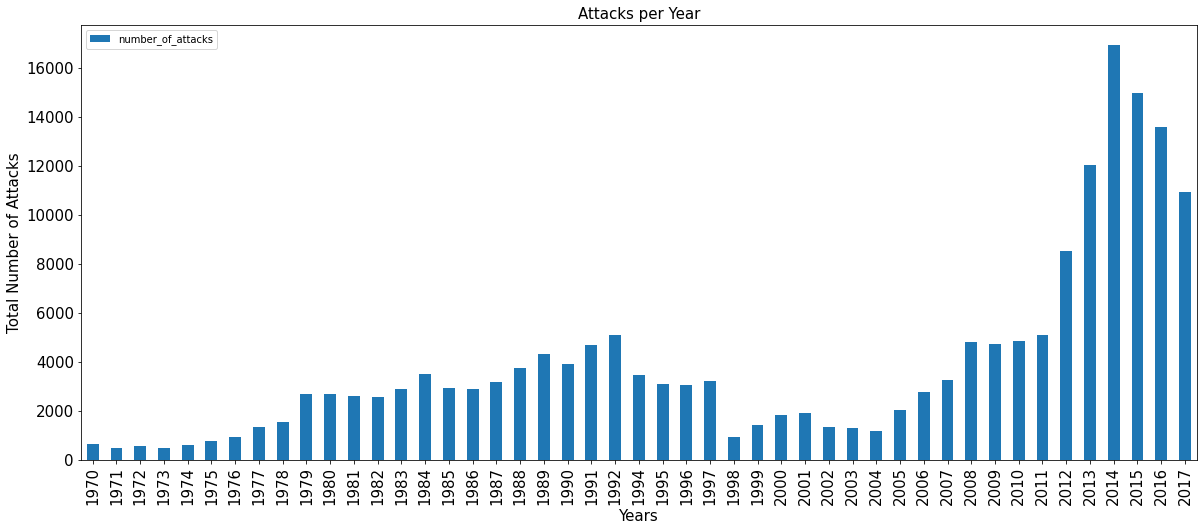

In [ ]:
year_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Attacks per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

In [84]:
print('The Year with maximum number of attacks:')
year_attacks.loc[year_attacks['number_of_attacks'] == year_attacks['number_of_attacks'].max()]

The Year with maximum number of attacks:


,number_of_attacks
year,
2014,16903


In [85]:
print('The Year with minimum number of attacks:')
year_attacks.loc[year_attacks['number_of_attacks'] == year_attacks['number_of_attacks'].min()]

The Year with minimum number of attacks:


,number_of_attacks
year,
1971,471


2. **Year wise Killed**

In [82]:
year_killed = terrorism[['year', 'killed']].groupby('year').sum()
year_killed.head()

,killed
year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Text(0, 0.5, 'Number of People Killed')

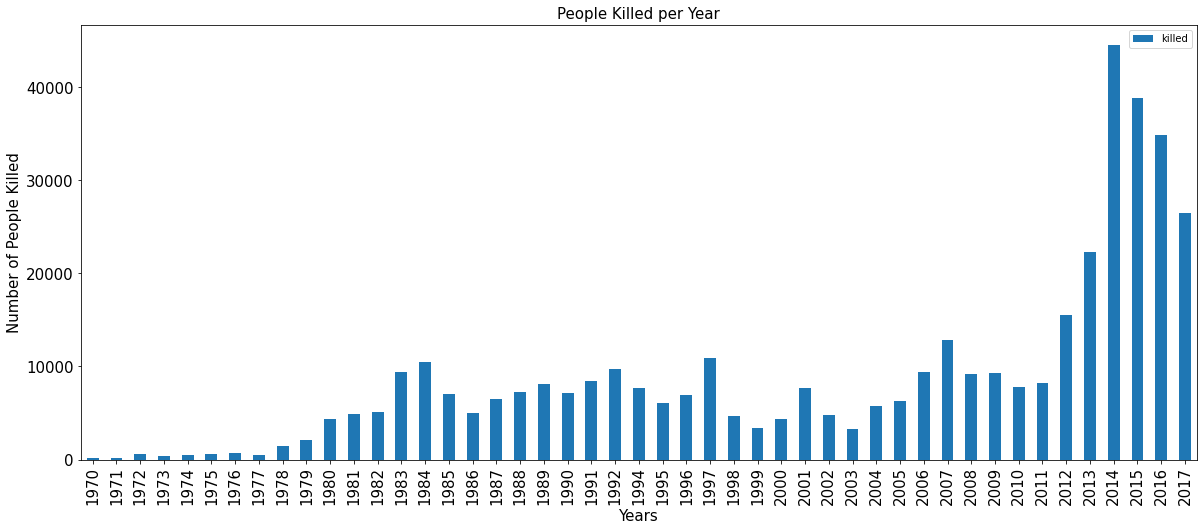

In [88]:
year_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Killed per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

In [89]:
print('The Year with maximum number of people killed:')
year_killed.loc[year_killed['killed'] == year_killed['killed'].max()]

The Year with maximum number of people killed:


,killed
year,
2014,44490.0


In [90]:
print('The Year with minimum number of people killed:')
year_killed.loc[year_killed['killed'] == year_killed['killed'].min()]

The Year with minimum number of people killed:


,killed
year,
1971,173.0


3. **Year wise Injured**

In [91]:
year_injured = terrorism[['year', 'wounded']].groupby('year').sum()
year_injured.head()

,wounded
year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Injured')

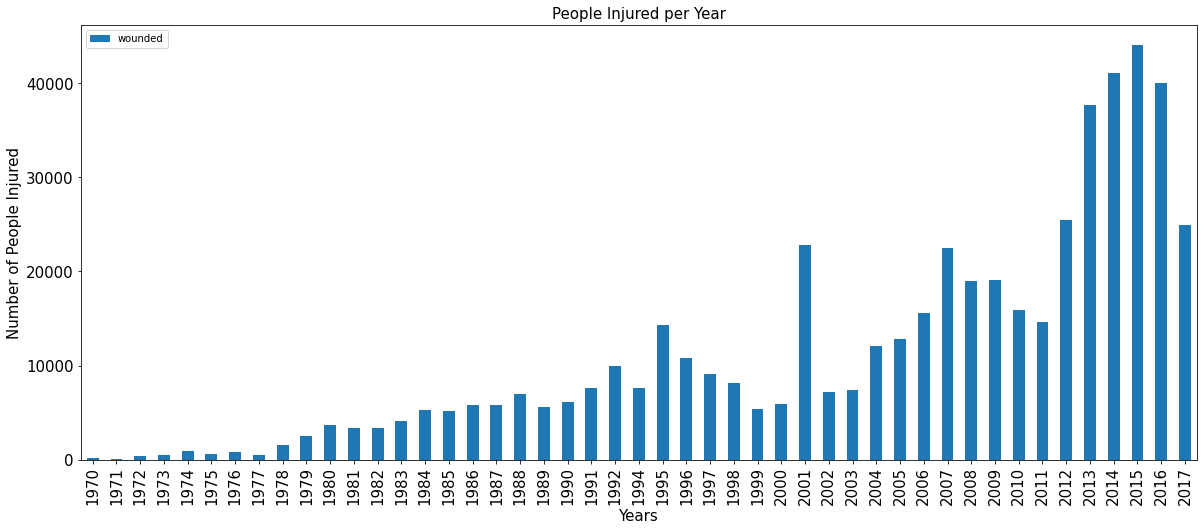

In [92]:
year_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Injured per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

In [93]:
print('The Year with maximum number of people injured:')
year_injured.loc[year_injured['wounded'] == year_injured['wounded'].max()]

The Year with maximum number of people injured:


,wounded
year,
2015,44043.0


In [94]:
print('The Year with minimum number of people injured:')
year_injured.loc[year_injured['wounded'] == year_injured['wounded'].min()]

The Year with minimum number of people injured:


,wounded
year,
1971,82.0


3. **year wise total casualties**

In [95]:
year_casualty = terrorism[['year', 'casualties']].groupby('year').sum()
year_casualty.head()

,casualties
year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


Text(0, 0.5, 'Number of Total Casualties')

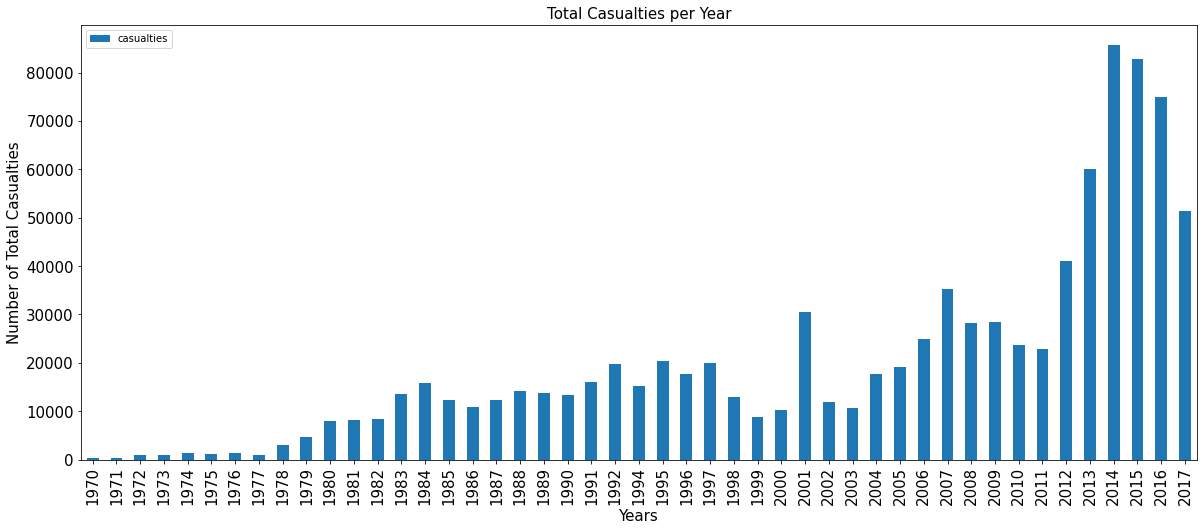

In [96]:
year_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Total Casualties per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

In [97]:
print('The Year with maximum number of casualties:')
year_casualty.loc[year_casualty['casualties'] == year_casualty['casualties'].max()]

The Year with maximum number of casualties:


,casualties
year,
2014,85618.0


In [98]:
print('The Year with minimum number of casualties:')
year_casualty.loc[year_casualty['casualties'] == year_casualty['casualties'].min()]

The Year with minimum number of casualties:


,casualties
year,
1971,255.0


## **Country wise Attacks and Damages**

1. **Country wise Attacks**

In [ ]:
country_attacks